In [1]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import numpy as np
from CDK_pywrapper import FPType

from rdkit.Chem import Draw
from rdkit import Chem
from itertools import combinations

In [2]:
import sys
sys.path.append('../programming_scripts/')

from MS2LDA_core import run_lda
from MS2LDA_core import predict_with_lda

from SMART_annotation import annotate_motifs

C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\sparsestack\StackedSparseArray.py:4: DeprecationWarning: Please use `get_index_dtype` from the `scipy.sparse` namespace, the `scipy.sparse.sputils` namespace is deprecated.
  from scipy.sparse.sputils import get_index_dtype


In [3]:
# spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-COLLECTIONS-PESTICIDES-POSITIVE.mgf"
# spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-NIH-SMALLMOLECULEPHARMACOLOGICALLYACTIVE.mgf"
# spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-SCIEX-LIBRARY.mgf"
spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\MEDUSA\notebooks\MS2LDA\PDE5_standards_annotated_pos_unique.mgf"

In [5]:
lda_model, corpus, id2word = run_lda(spectra_path=spectra_path, num_motifs=6)

In [6]:
pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.188106  0.042261       1        1  25.032580
0     -0.064294  0.281462       2        1  23.553334
4      0.158846 -0.132318       3        1  18.903098
3      0.235378  0.071511       4        1  18.446038
5     -0.239607 -0.165804       5        1  11.313868
2      0.097783 -0.097112       6        1   2.751081, topic_info=        Term        Freq       Total Category  logprob  loglift
159    185.1   67.000000   67.000000  Default  30.0000  30.0000
137  125.01+   67.000000   67.000000  Default  29.0000  29.0000
474   169.1+  185.000000  185.000000  Default  28.0000  28.0000
858   479.37  115.000000  115.000000  Default  27.0000  27.0000
862  532.26+  115.000000  115.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
161   191.14    0.781181    1.556782   Topic6  -6.2049   2.9036
169   55.05+    2.120021    5.659305   Topic6  -5.2066   2.6113
78    157.07    2.120142   12.023767   Topic6  -5.2065   1.8578
1    115.05+    2.789674  221.609884   Topic6  -4.9321  -0.7818
33    95.05+    2.120333   45.167543   Topic6  -5.2064   0.5344

[291 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
260       1  0.344760  100.09
260       3  0.642508  100.09
261       1  0.652031  100.1+
261       2  0.026614  100.1+
261       3  0.252828  100.1+
...     ...       ...     ...
392       1  0.122113  99.09+
392       2  0.093933  99.09+
392       3  0.410173  99.09+
392       4  0.369469  99.09+
392       5  0.003131  99.09+

[347 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 5, 4, 6, 3])

In [7]:
smiles_per_motifs, predicted_motifs, predicted_motifs_distribution, spectra = predict_with_lda(lda_model, spectra_path, id2word)

---

### Annotation

In [30]:
fps_motifs, smarts_motifs, motifs_similarities = annotate_motifs(smiles_per_motifs, fp_type=FPType.PubchemFP)

In [31]:
list(zip(list(range(1000)), motifs_similarities))

[(0, 0.48214285714285715),
 (1, 0.46956521739130436),
 (2, 0.6785714285714286),
 (3, 0.3476190476190476),
 (4, 0.13829787234042554),
 (5, 0.358695652173913),
 (6, 0.34545454545454546),
 (7, 0.6930232558139535),
 (8, 0.1393939393939394),
 (9, 0.5604395604395604),
 (10, 0.2968036529680365),
 (11, 0.2413793103448276),
 (12, 0.2864321608040201),
 (13, 0.17647058823529413),
 (14, 0.11557788944723618)]

In [32]:
#list(zip(list(range(1000)),list(combinations(range(66),2))))

In [33]:
n = 0
for motif_number, fps_motif in enumerate(fps_motifs):
    print(motif_number, len(smiles_per_motifs[motif_number]), np.sum(fps_motif))
    n += len(smiles_per_motifs[motif_number])
n

0 5 84.0
1 5 165.0
2 1 85.0
3 4 57.0
4 4 199.0
5 4 23.0


23

### Known Dataset

In [34]:
motif_number = 4

In [35]:
len(smarts_motifs[motif_number])

0

In [36]:
smarts_motifs[motif_number]

[]

In [37]:
len(smiles_per_motifs[motif_number])

4

In [38]:
smiles_per_motifs[motif_number]

['CCCC1=NN(C2=C1NC(=NC2=S)C3=C(C=CC(=C3)S(=O)(=O)N4CCN(CC4)C)OCC)C',
 'CCCC1=NN(C2=C1N=C(NC2=O)C3=C(C=CC(=C3)S(=O)(=O)N4CCN(CC4)CCO)OCC)C',
 'CCCC1=CN(C2=C1N=C(NC2=O)C3=C(C=CC(=C3)S(=O)(=O)N4CCN(CC4)CCO)OCCC)CC',
 'CCCC1=NN(C2=C1NC(=NC2=S)C3=C(C=CC(=C3)S(=O)(=O)N4CCN(CC4)CCO)OCC)C']

In [39]:
predicted_motifs_distribution[motif_number]

[[(4, 0.9987564)],
 [(4, 0.99810517)],
 [(4, 0.99910384)],
 [(3, 0.1651333), (4, 0.8339646)]]

In [40]:
mol_per_motif = [Chem.MolFromSmiles(smiles) for smiles in smiles_per_motifs[motif_number]]

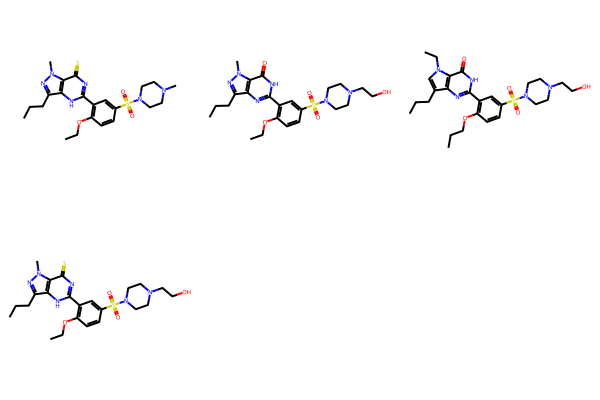

In [41]:
Draw.MolsToGridImage(mol_per_motif)

In [81]:
#mol_smarts_per_motif = [Chem.MolFromSmarts(smarts) for smarts in smarts_motifs[motif_number]]

In [88]:
#Draw.MolsToGridImage(mol_smarts_per_motif[10:])

---

### Unknown Dataset

In [24]:
#spectra_path_diffDB = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-NIH-SMALLMOLECULEPHARMACOLOGICALLYACTIVE.mgf"
spectra_path_diffDB = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-SCIEX-LIBRARY.mgf"

In [25]:
smiles_per_motifs_diffDB, predicted_motifs_diffDB = predict_with_lda(lda_model, spectra_path_diffDB, id2word)

In [26]:
annotated_motifs_diffDB = []
purities_maccs_diffDB = []
for smiles_per_motif in smiles_per_motifs_diffDB:
    annotated_motif, purity_maccs = annotate_motifs(smiles_per_motif)
    annotated_motifs_diffDB.append(annotated_motif)
    purities_maccs_diffDB.append(purity_maccs)

The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif
C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter

C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif
C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter

C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif
C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter

C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif
C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter

C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif
C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter

C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif
C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter

C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif
C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter

C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:55: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif
C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter

C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


The Chemistry Development Kit (CDK) is a collection of modular Java libraries
for processing chemical information (Cheminformatics). It can compute 14 different fingerprint
types and 287 molecular descriptors (it requires 3D molecular structures for the latter).

###################################

Should you publish results based on the PaDEL descriptors,
please cite:

Willighagen et al., (2017)  J. Cheminf. 9(3), doi:10.1186/s13321-017-0220-4,
May and Steinbeck., (2014) J. Cheminf., doi:10.1186/1758-2946-6-3,
Steinbeck et al., (2006) Curr. Pharm. Des. 12(17):2111-2120, doi:10.2174/138161206777585274,
Steinbeck et al., (2003) J. Chem. Inf. Comput. Sci. 43(2):493-500, doi:10.1021/ci025584y.

###################################




C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\CDK_pywrapper\cdk_pywrapper.py:151: UserWarning: Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors
  warnings.warn('Molecule lacks hydrogen atoms: this might affect the value of calculated descriptors')


In [27]:
for motif_number, purity_maccs in enumerate(purities_maccs_diffDB):
    purity_maccs_nan = purity_maccs.copy()
    purity_maccs_nan[purity_maccs_nan == 0] = np.nan
    print(motif_number, len(smiles_per_motifs_diffDB[motif_number]),len(annotated_motifs_diffDB[motif_number]), np.nanmean(purity_maccs_nan))

0 0 0 nan
1 0 0 nan
2 0 0 nan
3 0 0 nan
4 0 0 nan
5 0 0 nan
6 0 0 nan
7 0 0 nan
8 0 0 nan
9 0 0 nan
10 1 79 1.0
11 0 0 nan
12 0 0 nan
13 0 0 nan
14 0 0 nan
15 0 0 nan
16 0 0 nan
17 1 80 1.0
18 0 0 nan
19 0 0 nan
20 0 0 nan
21 0 0 nan
22 0 0 nan
23 1 36 1.0
24 0 0 nan
25 0 0 nan
26 2 2 0.5098039215686274
27 0 0 nan
28 0 0 nan
29 2 18 0.5833333333333334
30 0 0 nan
31 4 6 0.3477272727272727
32 1 37 1.0
33 6 9 0.24681238615664844
34 1 45 1.0
35 1 29 1.0
36 2 15 0.5862068965517241
37 0 0 nan
38 2 6 0.531578947368421
39 2 7 0.5546875
40 3 8 0.42611683848797244
41 5 2 0.2768211920529801
42 0 0 nan
43 3 14 0.4809523809523809
44 3 6 0.4479166666666667
45 3 17 0.5333333333333332
46 4 6 0.3475609756097561
47 5 10 0.3441176470588235
48 3 7 0.42028985507246375
49 1 56 1.0
50 4 4 0.3489010989010989
51 4 2 0.30743243243243246
52 1 60 1.0
53 6 4 0.3034188034188034
54 9 2 0.17965367965367968
55 13 3 0.17066534751422213
56 10 2 0.16044776119402984
57 12 5 0.18011603375527427
58 22 5 0.13261183261183263


C:\Users\dietr004\AppData\Local\Temp\ipykernel_31628\3576634217.py:4: RuntimeWarning: Mean of empty slice
  print(motif_number, len(smiles_per_motifs_diffDB[motif_number]),len(annotated_motifs_diffDB[motif_number]), np.nanmean(purity_maccs_nan))


In [28]:
motif_number = 22

In [29]:
len(annotated_motifs_diffDB[motif_number])

0

In [30]:
annotated_motifs_diffDB[motif_number]

[]

In [31]:
smiles_per_motifs_diffDB[motif_number]

[]

In [32]:
mol_per_motif_diffDB = [Chem.MolFromSmiles(smiles) for smiles in smiles_per_motifs_diffDB[motif_number]]

In [33]:
Draw.MolsToGridImage(mol_per_motif_diffDB)

[11:56:53] 

****
Pre-condition Violation
no draw context
Violation occurred on line 211 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\MolDraw2D\MolDraw2DCairo.cpp
Failed Expression: dp_cr
****



RuntimeError: Pre-condition Violation
	no draw context
	Violation occurred on line 211 in file Code\GraphMol\MolDraw2D\MolDraw2DCairo.cpp
	Failed Expression: dp_cr
	RDKIT: 2023.09.4
	BOOST: 1_78


----

In [64]:
smarts_mol = [Chem.MolFromSmarts(smarts) for smarts in annotated_motifs_diffDB[motif_number]]

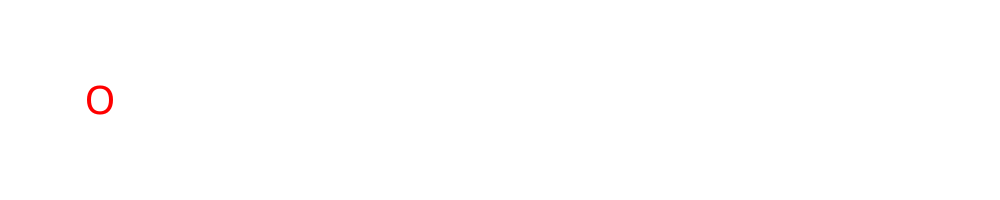

In [67]:
Draw.MolsToGridImage(smarts_mol[:5], molsPerRow=5)

In [29]:
Draw.MolsToGridImage(smarts_mol[9:], molsPerRow=5)

[14:52:27] 

****
Pre-condition Violation
no draw context
Violation occurred on line 211 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\MolDraw2D\MolDraw2DCairo.cpp
Failed Expression: dp_cr
****



RuntimeError: Pre-condition Violation
	no draw context
	Violation occurred on line 211 in file Code\GraphMol\MolDraw2D\MolDraw2DCairo.cpp
	Failed Expression: dp_cr
	RDKIT: 2023.09.4
	BOOST: 1_78
